# CPI Adjustment of Monetary Value

### github library used to download cpi values, even down to the region level
### see: https://github.com/datadesk/cpi

In [92]:
import cpi
import yfinance as yf
import pandas as pd
import datetime

In [2]:
# update cpi values (only do when there is a warning when importing)
# cpi.update()

In [3]:
stock_ticker = 'TSLA'

In [187]:
# recent history might not have the cpi data so I kept it to two months ago
shopify = yf.download(stock_ticker, start="2018-01-02", end="2021-05-19")
shopify.index = shopify.index.date
shopify.index.rename('Date', inplace = True)

[*********************100%***********************]  1 of 1 completed


In [188]:
shopify_close_nom = pd.DataFrame(shopify['Adj Close'])
shopify_close_nom.rename(columns = {'Adj Close': 'Price'}, inplace = True)
shopify_close_nom['nominal/real'] = 'nominal'

In [189]:
shopify

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,62.400002,64.421997,62.200001,64.106003,64.106003,21761000
2018-01-03,64.199997,65.050003,63.110001,63.450001,63.450001,22607500
2018-01-04,62.574001,63.709999,61.136002,62.924000,62.924000,49731500
2018-01-05,63.324001,63.448002,62.400002,63.316002,63.316002,22956000
2018-01-08,63.200001,67.403999,63.099998,67.281998,67.281998,49297000
...,...,...,...,...,...,...
2021-05-12,602.489990,620.409973,586.770020,589.890015,589.890015,33823600
2021-05-13,601.539978,606.460022,559.650024,571.690002,571.690002,44184900
2021-05-14,583.409973,592.869995,570.460022,589.739990,589.739990,33370900


## Adjust Stock Price Data with CPI

In [190]:
def inflate_price(data, column, date_column):
    """
    Inflation adjustment on user inputted column
    """
    data.reset_index(inplace = True)
    
    # don't even use the index parameter for pandas dataframe. it has a retarded usage.
    return pd.DataFrame(data = data.apply(lambda x: cpi.inflate(x[column], 
                      x[date_column], to=datetime.date(2021, 6, 1)), axis=1),
                        columns = ['Price']).set_index(data[date_column])

In [191]:
shopify_close_real = inflate_price(shopify, 'Adj Close', 'Date')
shopify_close_real['nominal/real'] = 'real'

In [192]:
shopify_close_real

,Price,nominal/real
Date,,
2018-01-02,70.268913,real
2018-01-03,69.549845,real
2018-01-04,68.973276,real
2018-01-05,69.402964,real
2018-01-08,73.750236,real
...,...,...
2021-05-12,595.370484,real
2021-05-13,577.001382,real
2021-05-14,595.219066,real


In [193]:
shopify_close = shopify_close_real.append(shopify_close_nom).reset_index()
shopify_close.rename(columns = {'index':'date'}, inplace = True)

In [194]:
shopify_close

,Date,Price,nominal/real
0,2018-01-02,70.268913,real
1,2018-01-03,69.549845,real
2,2018-01-04,68.973276,real
3,2018-01-05,69.402964,real
4,2018-01-08,73.750236,real
...,...,...,...
1695,2021-05-12,589.890015,nominal
1696,2021-05-13,571.690002,nominal
1697,2021-05-14,589.739990,nominal
1698,2021-05-17,576.830017,nominal


In [195]:
shopify_close = shopify_close.pivot(index = 'Date', columns = 'nominal/real', values = 'Price')

<AxesSubplot:title={'center':'Real and Nominal Values of TSLA'}, xlabel='Date'>

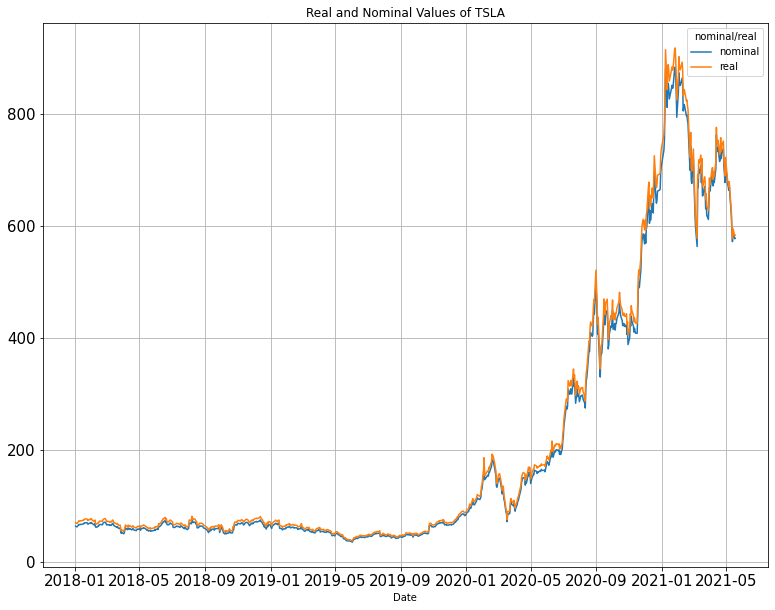

In [196]:
shopify_close.plot(figsize=(13,10), fontsize = 15, title = f"Real and Nominal Values of {stock_ticker}",
                                    grid = True)

## Get CPI Historical Time Series, filter on monthly, and order by date (if one wants to use these as features!!)

In [20]:
cpi_df = cpi.series.get(seasonally_adjusted=True).to_dataframe()
cpi_df = cpi_df[cpi_df['period_type'] == 'monthly']
cpi_df = cpi_df.sort_values('date')

C:\Users\Eddie\anaconda3\envs\securities-analysis\lib\site-packages\cpi\models.py:299: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  return json_normalize(dict_list, sep="_")


In [21]:
cpi_df

,year,date,value,series_id,series_title,series_survey,series_seasonally_adjusted,series_periodicity_id,series_periodicity_code,series_periodicity_name,...,series_area_name,series_items_id,series_items_code,series_items_name,period_id,period_code,period_abbreviation,period_name,period_month,period_type
275,1947,1947-01-01,21.480,CUSR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,True,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M01,M01,JAN,January,1,monthly
276,1947,1947-02-01,21.620,CUSR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,True,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M02,M02,FEB,February,2,monthly
277,1947,1947-03-01,22.000,CUSR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,True,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M03,M03,MAR,March,3,monthly
278,1947,1947-04-01,22.000,CUSR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,True,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M04,M04,APR,April,4,monthly
279,1947,1947-05-01,21.950,CUSR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,True,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M05,M05,MAY,May,5,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2019,2019-07-01,256.161,CUSR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,True,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M07,M07,JUL,July,7,monthly
271,2019,2019-08-01,256.300,CUSR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,True,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M08,M08,AUG,August,8,monthly
272,2019,2019-09-01,256.358,CUSR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,True,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M09,M09,SEP,September,9,monthly
273,2019,2019-10-01,257.271,CUSR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,True,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M10,M10,OCT,October,10,monthly
